## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

### Question 1 - Defective products

In a manufacturing pipeline products are 3% defective. We are interested in examining a defective product to see what goes wrong on the belt. We need to ask the facility manager to send us a set of independent samples for examination.

#### 1.A

How many independent samples should we ask for in order to have a 85% probability of having at least one defective product in the batch sent? You should write a function.

In [4]:
def get_independent_samples_by_prob(defective_prob=0.03, desired_defective_prob=0.85):
    # the probability for defective product is 0.03
    # the probability for having at least 1 defective product from n samples is 0.85
    #
    # X ~ Bin(n,0.03), n = ?
    # P(Y=k) = n choose k * p^k * (1-p)^(n-k)
    #
    # P(Y>=1) = 0.85 => 1 - P(Y<1) = 1 => 1 - P(Y = 0) => 1 - [n choose 0 * 0.03^0 * (1-0.03)^(n-0)]
    # => 1 - [(1-0.03)^n] = 0.85 => (1-0.03)^n = 1 - 0.85
    #
    # therefore, in order to find the n samples:
    # we need to find the first n when the left equation is smaller then the right one
    # (1-0.03)^n < 1-0.85
    #
    # another option to find the n: we can use the log operation (and to ceil the result) => 
    # log_(1 - defective_prob) of (1 - defective_prob)^n = log_(1 - defective_prob) of the desired_defective_prob
    
    find = False
    n = 1
    while not find:
        if (1 - defective_prob) ** n < (1 - desired_defective_prob):
            find = True
        else:
            n += 1
    return n


print(get_independent_samples_by_prob())

63


#### 1.B
Answer this part again with the following changes: products are 4% defective and we want a 95% probability of at least one defective product in the batch.

In [5]:
print(get_independent_samples_by_prob(defective_prob=0.04, desired_defective_prob=0.95))

74


#### 1.C 

Consider the following cases and calculate how many independent samples are required: 

1. Products are 10% defective and we want a 90% probability of at least 5 defective products in the batch.
1. Products are 30% defective and we want a 90% probability of at least 15 defective products in the batch.

Explain the difference between the two results. You should use mathematical reasoning based on the properties of distributions you saw in class and visualizations in your answer.

In [6]:
import scipy.special

def get_independent_samples_by_prob_at_least(defective_prob=0.1, desired_defective_prob=0.9, defective_at_least=5):
    # the probability for defective product is 0.1
    # the probability for having at least 5 defective products from n samples is 0.9
    #
    # X ~ Bin(n,0.1), n = ?
    # P(Y=k) = n choose k * p^k * (1-p)^(n-k)
    #
    # P(Y>=5) = 0.9 => 1-[P(0) + P(1) + P(2) + P(3) + P(4)] = 0.9
    # therefore, in order to find the n samples:
    # we need to find the first n when the left equation is greater then the right one
    # 1 - [P(0) + P(1) + P(2) + P(3) + P(4)] > 0.9
    #
    # using scipy.special.binom(n, k) to perform: n choose k

    n = defective_at_least  # we need to start from this number in order to perform the binomial coefficient
    found = False

    while not found:
        total_prob = 0
        for k in range(defective_at_least):
            total_prob += scipy.special.binom(n, k) * defective_prob**k * (1 - defective_prob)**(n-k)
        if 1 - total_prob > desired_defective_prob:
            found = True
        else:
            n += 1
    return n


print("1." + str(get_independent_samples_by_prob_at_least(defective_prob=0.1, desired_defective_prob=0.9, defective_at_least=5)))
print("2." + str(get_independent_samples_by_prob_at_least(defective_prob=0.3, desired_defective_prob=0.9, defective_at_least=15)))

1.78
2.64


n=78:
Mean: 7.800
Variance: 7.020

n=64:
Mean: 19.200
Variance: 13.440


Text(0.5, 1.0, 'n=64')

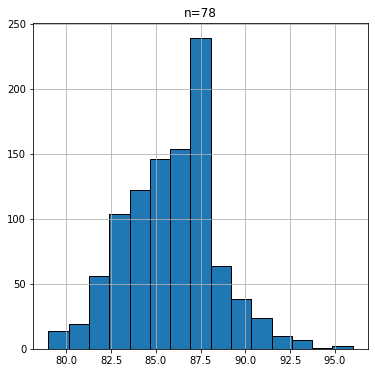

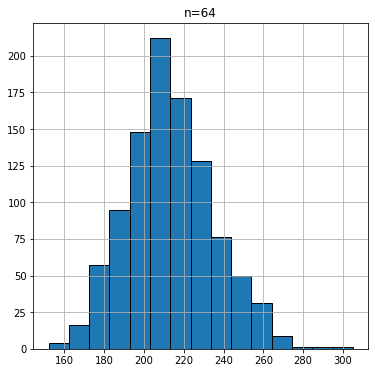

In [4]:
# Explanation:
# As we can see in the visualization below, the difference between 
# the two results is affected by the statistics measurements (in our example: mean and variance).
# In the second sample (n=64), the variance and the mean are higher, 
# meaning that numbers in this set are distant from the mean and each other.
# 
# The larger the n the more we get a distribution that is close to a normal distribution 
# according to the central limit theorem.

from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt

n = 78
p = 0.1
loc = n

mean, var = stats.binom.stats(n, p)
print('n=78:')
print('Mean: {0:.3f}'.format(mean))
print('Variance: {0:.3f}\n'.format(var))

sample1 = stats.binom.rvs(n, p, loc=loc, size=1000)
pd.DataFrame(sample1).hist(bins=15, figsize=(6,6), edgecolor="k", linewidth=1)
plt.title('n=78')

n = 64
p = 0.3
loc = n

mean, var = stats.binom.stats(n, p)
print('n=64:')
print('Mean: {0:.3f}'.format(mean))
print('Variance: {0:.3f}'.format(var))

sample2 = stats.nbinom.rvs(n, p, loc=loc, size=1000)
pd.DataFrame(sample2).hist(bins=15, figsize=(6,6), edgecolor="k", linewidth=1)
plt.title('n=64')


### Question 2 - Rent distributions in Randomistan

The state of Randomistan conducted a survey to study the distribution of rent paid in two neighboring towns, Stochastic Heights and Random Grove, to be denoted SH and RG.<br> 

Here are some findings of the survey:
* The population of SH and RG is 16,000 and 22,000 respectively. <br>
* The mean rent in SH and RG is 6300RCU and 4200RCU respectively.
* The median rent is 4600RCU in both towns.
* The IQR of the rent is smaller in SH than in RG.

All data generated in this question needs to be consistent with these findings.

#### 2.A
Draw histograms that describe 2 different scenarii of possible distributions of rent in the two towns.Your histograms should:<br>
* Use bins of 100RCU each.
* Have at least 10 non zero bins.

*** Scenario 1 ***
SH Population: 16000
SH Mean: 6300.0
SH Median: 4600.0
SH IQR: 2900.0

RG Population: 22000
RG Mean: 4200.0
RG Median: 4600.0
RG IQR: 5200.0


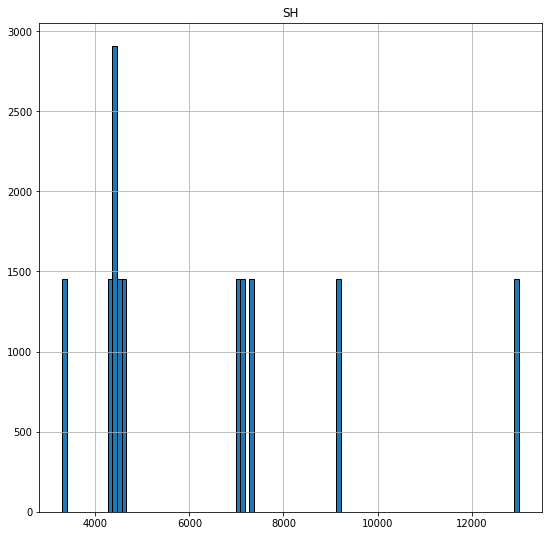

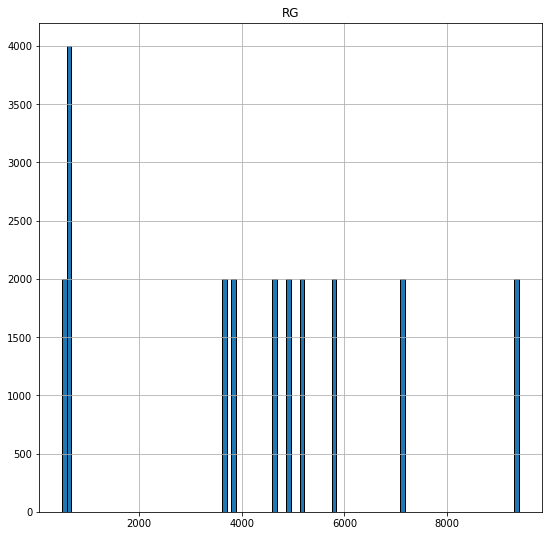

*** Scenario 2 ***
SH Population: 16000
SH Mean: 6300.0
SH Median: 4600.0
SH IQR: 4900.0

RG Population: 22000
RG Mean: 4200.0
RG Median: 4600.0
RG IQR: 5050.0


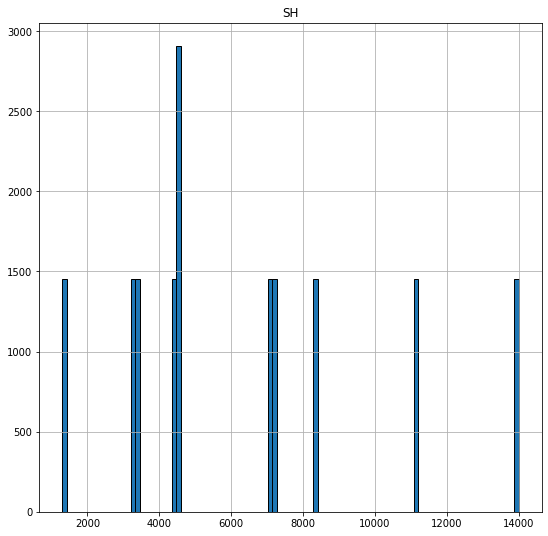

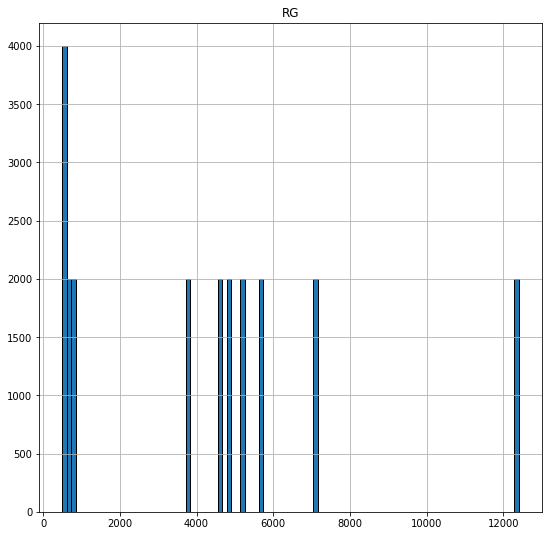

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def rent_distribution_scenario_1():
    # generates an array based on the given inputs: population, mean, median and IQR
    # presents at least 10 non-zero bins
    # I used 11 values for the median and mean measurements, and multiplied them to get the population size

    print('*** Scenario 1 ***')
    
    sh_population = 16000
    sh = np.array([3300, 4350, 4400, 4450, 4500, 4600, 7050, 7150, 7300, 9200, 13000] * int(sh_population / 11))
    sh_mean = np.mean(sh)
    sh_median = np.median(sh)
    sh_iqr = np.percentile(sh, 75) - np.percentile(sh, 25)
    print('SH Population: {0}'.format(sh_population))
    print('SH Mean: {0}'.format(sh_mean))
    print('SH Median: {0}'.format(sh_median))
    print('SH IQR: {0}\n'.format(sh_iqr))

    rg_population = 22000
    rg = np.array([500, 600, 600, 3700, 3800, 4600, 4900, 5200, 5800, 7100, 9400] * int(rg_population / 11))
    rg_mean = np.mean(rg)
    rg_median = np.median(rg)
    rg_iqr = np.percentile(rg, 75) - np.percentile(rg, 25)
    print('RG Population: {0}'.format(rg_population))
    print('RG Mean: {0}'.format(rg_mean))
    print('RG Median: {0}'.format(rg_median))
    print('RG IQR: {0}'.format(rg_iqr))

    pd.DataFrame(sh).hist(bins=100, figsize=(9, 9), edgecolor="k", linewidth=1)
    plt.title('SH')
    plt.show()

    pd.DataFrame(rg).hist(bins=100, figsize=(9, 9), edgecolor="k", linewidth=1)
    plt.title('RG')
    plt.show()


def rent_distribution_scenario_2():
    # generates an array based on the given inputs: population, mean, median and IQR
    # presents at least 10 non-zero bins
    # I used 11 values for the median and mean measurements, and multiplied them to get the population size

    print('*** Scenario 2 ***')
    
    sh_population = 16000
    sh = np.array([1300, 3300, 3400, 4450, 4550, 4600, 7050, 7150, 8300, 11200, 14000] * int(sh_population / 11))
    sh_mean = np.mean(sh)
    sh_median = np.median(sh)
    sh_iqr = np.percentile(sh, 75) - np.percentile(sh, 25)
    print('SH Population: {0}'.format(sh_population))
    print('SH Mean: {0}'.format(sh_mean))
    print('SH Median: {0}'.format(sh_median))
    print('SH IQR: {0}\n'.format(sh_iqr))

    rg_population = 22000
    rg = np.array([500, 600, 650, 750, 3800, 4600, 4900, 5200, 5700, 7100, 12400] * int(rg_population / 11))
    rg_mean = np.mean(rg)
    rg_median = np.median(rg)
    rg_iqr = np.percentile(rg, 75) - np.percentile(rg, 25)
    print('RG Population: {0}'.format(rg_population))
    print('RG Mean: {0}'.format(rg_mean))
    print('RG Median: {0}'.format(rg_median))
    print('RG IQR: {0}'.format(rg_iqr))

    pd.DataFrame(sh).hist(bins=100, figsize=(9, 9), edgecolor="k", linewidth=1)
    plt.title('SH')
    plt.show()

    pd.DataFrame(rg).hist(bins=100, figsize=(9, 9), edgecolor="k", linewidth=1)
    plt.title('RG')
    plt.show()


rent_distribution_scenario_1()
rent_distribution_scenario_2()
 

#### 2.B
Draw a histogram of a third scenario with the same properties. <br>
In addition, in this scenario the rent in SH should have a higher variance than the rent in RG.

*** Scenario 3 ***
SH Population: 16000
SH Mean: 6300.0
SH Median: 4600.0
SH IQR: 4900.0
SH Variance: 14888181.82

RG Population: 22000
RG Mean: 4200.0
RG Median: 4600.0
RG IQR: 4950.0
RG Variance: 11785909.09


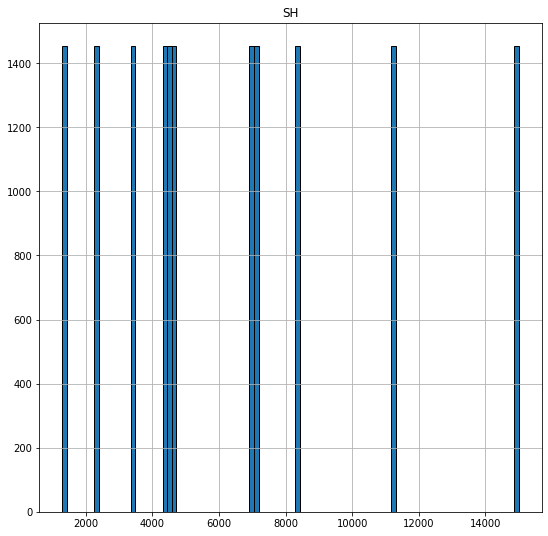

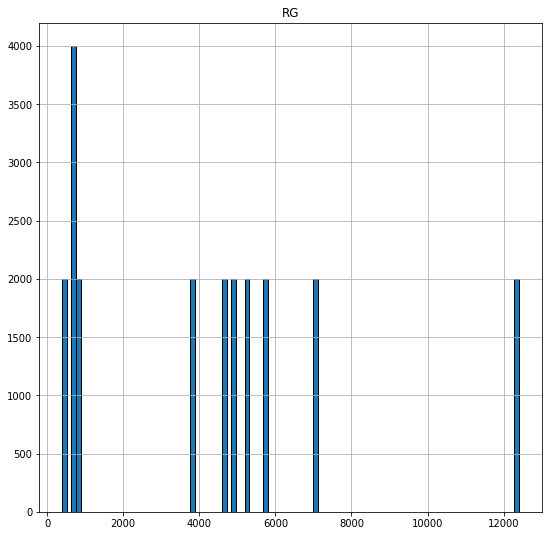

In [8]:
def rent_distribution_scenario_3():
    # generates an array based on the given inputs: population, mean, median and IQR
    # presents at least 10 non-zero bins
    # I used 11 values for the median and mean measurements, and multiplied them to get the population size

    print('*** Scenario 3 ***')

    sh_population = 16000
    sh = np.array([1300, 2300, 3400, 4450, 4550, 4600, 7050, 7150, 8300, 11200, 15000] * int(sh_population / 11))
    sh_mean = np.mean(sh)
    sh_median = np.median(sh)
    sh_iqr = np.percentile(sh, 75) - np.percentile(sh, 25)
    sh_var = np.var(sh)
    print('SH Population: {0}'.format(sh_population))
    print('SH Mean: {0}'.format(sh_mean))
    print('SH Median: {0}'.format(sh_median))
    print('SH IQR: {0}'.format(sh_iqr))
    print('SH Variance: {0:.2f}\n'.format(sh_var))

    rg_population = 22000
    rg = np.array([400, 800, 650, 750, 3800, 4600, 4900, 5200, 5700, 7000, 12400] * int(rg_population / 11))
    rg_mean = np.mean(rg)
    rg_median = np.median(rg)
    rg_iqr = np.percentile(rg, 75) - np.percentile(rg, 25)
    rg_var = np.var(rg)
    print('RG Population: {0}'.format(rg_population))
    print('RG Mean: {0}'.format(rg_mean))
    print('RG Median: {0}'.format(rg_median))
    print('RG IQR: {0}'.format(rg_iqr))
    print('RG Variance: {0:.2f}'.format(rg_var))

    pd.DataFrame(sh).hist(bins=100, figsize=(9, 9), edgecolor="k", linewidth=1)
    plt.title('SH')
    plt.show()

    pd.DataFrame(rg).hist(bins=100, figsize=(9, 9), edgecolor="k", linewidth=1)
    plt.title('RG')
    plt.show()


rent_distribution_scenario_3()

The survey also examined the per household income (PHI) in these two places.<br>

It found that:<br>
* The mean of PHI in SH is 12500 and in RG is 8500.
* The median is 12000 in SH and 8000 in RG.
* The covariance of the rent and the PHI was observed to be as in the formula below with $\alpha=97\%$ and $\alpha=89\%$ in SH and in RG respectively.<br><br>
$$Cov(rent, PHI) = \alpha * \sqrt{Var(rent)} * \sqrt{Var(PHI)}$$

#### 2.C
Produce rent and PHI data for the two cities, that is consistent with these findings. The covariances in your data can deviate by up to 1% from the numbers given $\alpha$.

In [9]:
def phi_rent_distribution():
    print('*** PHI Rent ***\n')

    sh_population = 16000
    sh = np.array([1300, 2300, 3400, 4450, 4550, 4600, 7050, 7150, 8300, 11200, 15000] * int(sh_population / 11))
    sh_mean = np.mean(sh)
    sh_median = np.median(sh)
    sh_iqr = np.percentile(sh, 75) - np.percentile(sh, 25)
    sh_var = np.var(sh)

    print('SH Population: {0}'.format(sh_population))
    print('SH Mean: {0}'.format(sh_mean))
    print('SH Median: {0}'.format(sh_median))
    print('SH IQR: {0}'.format(sh_iqr))
    print('SH Variance: {0:.2f}\n'.format(sh_var))

    sh_phi = np.array([1200, 3600, 4200, 9000, 12000, 12000, 14500, 15000, 19000, 21000, 26000] * int(sh_population / 11))
    sh_phi_mean = np.mean(sh_phi)
    sh_phi_median = np.median(sh_phi)
    sh_phi_var = np.var(sh_phi)

    sh_alpha = 0.97
    sh_phi_cov = sh_alpha * np.sqrt(sh_var) * np.sqrt(sh_phi_var)

    print('SH PHI Mean: {0}'.format(sh_phi_mean))
    print('SH PHI Median: {0}'.format(sh_phi_median))
    print('SH PHI Variance: {0:.2f}'.format(sh_phi_var))
    print('SH PHI Covariance: {0:.2f}\n'.format(sh_phi_cov))

    # validate the covariances in the data (should be deviated by up to 1% from the numbers given alpha:
    #
    # calculate the covariance between the sh data (1-dimension) to sh-phi data (1-dimension)
    # the results of the numpy.cov function are:
    # np.cov(a,b) =
    # cov(a,a) cov(a,b)
    # cov(b,a) cov(b,b)
    # => therefore, we need to choose the index [0][1] for the cov(a,b)
    sh_cov = np.cov(sh, sh_phi)[0][1]
    print('SH - Up To 1% Validation: {0}\n\n'.format(sh_cov / sh_phi_cov))

    rg_population = 22000
    rg = np.array([400, 800, 650, 750, 3800, 4600, 4900, 5200, 5700, 7000, 12400] * int(rg_population / 11))
    rg_mean = np.mean(rg)
    rg_median = np.median(rg)
    rg_iqr = np.percentile(rg, 75) - np.percentile(rg, 25)
    rg_var = np.var(rg)

    print('RG Population: {0}'.format(rg_population))
    print('RG Mean: {0}'.format(rg_mean))
    print('RG Median: {0}'.format(rg_median))
    print('RG IQR: {0}'.format(rg_iqr))
    print('RG Variance: {0:.2f}\n'.format(rg_var))

    rg_phi = np.array([2000, 3500, 4600, 7000, 7500, 8000, 9000, 12200, 12500, 12700, 14500] * int(rg_population / 11))
    rg_phi_mean = np.mean(rg_phi)
    rg_phi_median = np.median(rg_phi)
    rg_phi_var = np.var(rg_phi)

    rg_alpha = 0.89
    rg_phi_cov = rg_alpha * np.sqrt(rg_var) * np.sqrt(rg_phi_var)

    print('RG PHI Mean: {0}'.format(rg_phi_mean))
    print('RG PHI Median: {0}'.format(rg_phi_median))
    print('RG PHI Variance: {0:.2f}'.format(rg_phi_var))
    print('RG PHI Covariance: {0:.2f}\n'.format(rg_phi_cov))

    # validate the covariances in the data (should be deviated by up to 1% from the numbers given alpha:
    rg_cov = np.cov(rg, rg_phi)[0][1]
    print('RG - Up To 1% Validation: {0}'.format(rg_cov / rg_phi_cov))


phi_rent_distribution()

*** PHI Rent ***

SH Population: 16000
SH Mean: 6300.0
SH Median: 4600.0
SH IQR: 4900.0
SH Variance: 14888181.82

SH PHI Mean: 12500.0
SH PHI Median: 12000.0
SH PHI Variance: 54140000.00
SH PHI Covariance: 27539223.58

SH - Up To 1% Validation: 0.9906985717685154


RG Population: 22000
RG Mean: 4200.0
RG Median: 4600.0
RG IQR: 4950.0
RG Variance: 11785909.09

RG PHI Mean: 8500.0
RG PHI Median: 8000.0
RG PHI Variance: 15412727.27
RG PHI Covariance: 11995305.05

RG - Up To 1% Validation: 0.999906338590199


#### 2.D
Produce two heatmaps that describe these two bivariate joint distributions. Make sure you carefully consider the selected binning resolution.

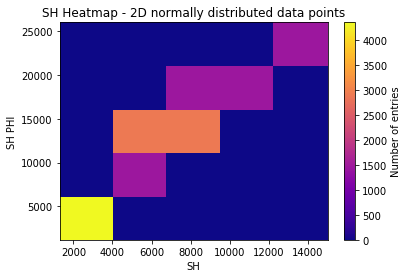

In [10]:
def sh_rent_visualization():
    # based on the last data
    sh_population = 16000
    sh = np.array([1300, 2300, 3400, 4450, 4550, 4600, 7050, 7150, 8300, 11200, 15000] * int(sh_population / 11))
    sh_phi = np.array([1200, 3600, 4200, 9000, 12000, 12000, 14500, 15000, 19000, 21000, 26000] * int(sh_population / 11))

    # Construct 2D histogram from data using the 'plasma' colormap
    plt.hist2d(sh, sh_phi, bins=5, cmap='plasma')

    # Plot a color bar with label.
    cb = plt.colorbar()
    cb.set_label('Number of entries')

    # Add title and labels to plot.
    plt.title('SH Heatmap - 2D normally distributed data points')
    plt.xlabel('SH')
    plt.ylabel('SH PHI')
    plt.show()


sh_rent_visualization()

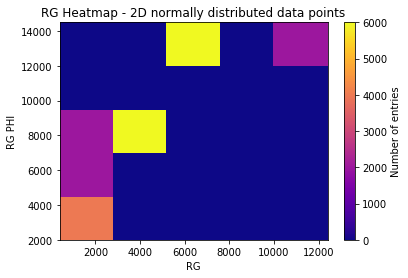

In [11]:
def rg_rent_visualization():
    # based on the last data
    rg_population = 22000
    rg = np.array([400, 800, 650, 750, 3800, 4600, 4900, 5200, 5700, 7000, 12400] * int(rg_population / 11))
    rg_phi = np.array([2000, 3500, 4600, 7000, 7500, 8000, 9000, 12200, 12500, 12700, 14500] * int(rg_population / 11))

    # Construct 2D histogram from data using the 'plasma' colormap
    plt.hist2d(rg, rg_phi, bins=5, cmap='plasma')

    # Plot a color bar with label.
    cb = plt.colorbar()
    cb.set_label('Number of entries')

    # Add title and labels to plot.
    plt.title('RG Heatmap - 2D normally distributed data points')
    plt.xlabel('RG')
    plt.ylabel('RG PHI')
    plt.show()


rg_rent_visualization()

### Question 3 - Covariance and independence

What is the variance of the sum X +Y + Z of three random variables in terms of the variances of X, Y and Z and the covariances between each pair of random variables? What happens if X,Y,Z are pairwise independent? If X,Y,Z are pairwise independent, are they necessarily collectively independent? Prove your answer.

# Answer 

$Var(X + Y + Z) = ?$


## Definitions:

### Variance definition: 
$Var(X) = E(X^2) - (E(X))^2$

### Covariance definition: 
$Cov(X,Y) = E(XY) - E(X)E(Y)$


## Calculation
$Var(X + Y + Z) = E((X + Y + Z)^2) - (E(X+ Y + Z))^2$ 

$(1)\quad E((X + Y + Z)^2) = E(X^2 + Y^2 + Z^2 + 2XY + 2XZ + 2YZ)$ \
$\quad\quad= E(X^2) + E(Y^2) + E(Z^2) + 2E(XY) + 2E(XZ) + 2E(YZ)$ -> Based on linearity of expectations 

$(2)\quad (E(X+ Y + Z))^2 = (E(X))^2 + (E(Y))^2 + (E(Z))^2 + 2E(X)E(Y) + 2E(X)E(Z) + 2E(Y)E(Z)$

#### Calculation (1) - (2):
$= E(X^2) - (E(X))^2 + $ \
$\quad E(Y^2) - (E(Y))^2 + $ \
$\quad E(Z^2) - (E(Z))^2 + $ \
$\quad 2(E(XY) - E(X)E(Y)) + $ \
$\quad 2(E(XZ) - E(X)E(Z)) + $ \
$\quad 2(E(YZ) - E(Y)E(Z))$ 

#### Base on the Variance & Covariance definitions:
$E(X^2) - (E(X))^2 = Var(X) $ \
$E(Y^2) - (E(Y))^2 = Var(Y) $ \
$E(Z^2) - (E(Z))^2 = Var(Z) $ \
$2(E(XY) - E(X)E(Y)) = 2Cov(X,Y) $ \
$2(E(XZ) - E(X)E(Z)) = 2Cov(X,Z) $ \
$2(E(YZ) - E(Y)E(Z)) = 2Cov(Y,Z) $ 

#### Result:
$Var(X + Y + Z) = Var(X) + Var(Y) + Var(Z) + 2(Cov(X,Y) + Cov(X,Z) + Cov(Y,Z))$

##### Covariance and independence
If X,Y,Z are pairwise independent, then their covariance is 0.

$Cov(X,Y) = Cov(X,Z) = Cov(Y,Z) = 0$ 

Therefore, 

$Var(X + Y + Z) = Var(X) + Var(Y) + Var(Z)$

##### Collectively Independent
$P(X,Y,Z) = P(X)P(Y)P(Z) ?$

By definition, collectively independent events are also pairwise independent. But a set of events that is pairwise independent isnâ€™t automatically collectively independent. They must also meet the condition: $P(X,Y,Z) = P(X)P(Y)P(Z)$

A standard example involves two dice: #1 #2

X = Event that the sum on #1 and #2 is 7 \
Y = Event that #1 shows 1 \
Z = Event that #2 shows 6

$P(X) = P(Y) = P(Z) = \frac6{36} = \frac16$ \
$P(X\cap Y) = P(Y\cap Z) = P(X\cap Z) = \frac1{36} = P(X)P(Y) = P(Y)P(Z) = P(X)P(Z)$ \
But $P(X \cap Y \cap Z) = \frac6{36} \neq P(X)P(Y)P(Z)$

Therefore X, Y, Z are pairwise independent, but not necessarily collectively independent.

### Question 4 - Convolutions

#### 4.A
Write a program, `Q = NFoldConv(P , n)`, that takes as input:
* A distribution, P, of a random variable that takes finitely many integer values
* An integer n

and produces the distribution, Q, of the sum of n independent repeats of random variables, each of which has the distribution P.

In [12]:
def NFoldConv(P, n):
    Q = {}
    i = 0

    # performs n independent repeats
    while i < n:
        if i == 0:
            Q = P.copy()  # for n=1 we return the P distribution
        else:
            d = {}
            for q in Q:
                for p in P:
                    # check if the sum of the independent random variables exist
                    # if not, we would add it to the dictionary with the new probability
                    if q + p in d:
                        d[q + p] += Q[q] * P[p]   
                    else:
                        d[q + p] = Q[q] * P[p]
            Q = d.copy()
        i += 1

    return Q

#### 4.B
Compute the distribution of the sum of the results of rolling a fair octahedron 17 times.

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/Octahedron.jpg" width="200">


In [13]:
P = {
        1: 1.0/8,
        2: 1.0/8,
        3: 1.0/8,
        4: 1.0/8,
        5: 1.0/8,
        6: 1.0/8,
        7: 1.0/8,
        8: 1.0/8
}
n = 17

NFoldConv(P, n)

{17: 4.440892098500626e-16,
 18: 7.549516567451064e-15,
 19: 6.794564910705958e-14,
 20: 4.303224443447107e-13,
 21: 2.1516122217235534e-12,
 22: 9.036771331238924e-12,
 23: 3.313482821454272e-11,
 24: 1.088715784192118e-10,
 25: 3.2660718574106795e-10,
 26: 9.07134811711785e-10,
 27: 2.3577291230481023e-09,
 28: 5.782673007104222e-09,
 29: 1.3473395732432891e-08,
 30: 2.998400727705075e-08,
 31: 6.401734875538523e-08,
 32: 1.3161584089260714e-07,
 33: 2.613809253482202e-07,
 34: 5.027422242953605e-07,
 35: 9.38663699212583e-07,
 36: 1.7045993589981379e-06,
 37: 3.015970226893927e-06,
 38: 5.206881849684208e-06,
 39: 8.783168114145923e-06,
 40: 1.449303744882613e-05,
 41: 2.3418493098503745e-05,
 42: 3.7090165106334894e-05,
 43: 5.762708941681183e-05,
 44: 8.790117605705916e-05,
 45: 0.00013172354057466862,
 46: 0.0001940465160554794,
 47: 0.000281171099826949,
 48: 0.00040094502474907756,
 49: 0.0005629319236253316,
 50: 0.0007785276598544222,
 51: 0.0010609964316725673,
 52: 0.001425

#### 4.C
Assume that the price of a stock changes in any given day according to (in NIS):

$$P=\begin{pmatrix}
-1 & 0 & 1 & 2 & 3 \\
0.3 & 0.15 & 0.15 & 0.15 & 0.25
\end{pmatrix}$$

1. What is the distribution of the change in stock after 2 consecutive days of (independent) changes? After 5 consecutive days? 

In [14]:
P = {-1: 0.3, 0: 0.15, 1: 0.15, 2: 0.15, 3: 0.25}
n = 2
NFoldConv(P, n)

{-2: 0.09,
 -1: 0.09,
 0: 0.1125,
 1: 0.135,
 2: 0.21749999999999997,
 3: 0.12,
 4: 0.0975,
 5: 0.075,
 6: 0.0625}

In [15]:
P = {-1: 0.3, 0: 0.15, 1: 0.15, 2: 0.15, 3: 0.25}
n = 5
NFoldConv(P, n)

{-5: 0.00243,
 -4: 0.006075,
 -3: 0.012149999999999998,
 -2: 0.021262499999999997,
 -1: 0.038221874999999995,
 0: 0.053738437499999986,
 1: 0.07074843749999998,
 2: 0.08720156249999998,
 3: 0.10407656249999997,
 4: 0.10719843749999998,
 5: 0.10638843749999999,
 6: 0.09968906249999998,
 7: 0.08860781249999998,
 8: 0.0683578125,
 9: 0.0517078125,
 10: 0.0363571875,
 11: 0.0233671875,
 12: 0.0120703125,
 13: 0.0064453125,
 14: 0.0029296875,
 15: 0.0009765625}

2. What is the probability that the stock has gained strictly more than 7NIS after 5 days? Has lost strictly more than 4NIS? Explain your answers.

In [16]:
def get_stock_probability():
    # first we need to calculate the probabilities of 5 days using the NFoldConv function
    P = {-1: 0.3, 0: 0.15, 1: 0.15, 2: 0.15, 3: 0.25}
    n = 5
    probs_of_5_days = NFoldConv(P, n)

    # initial probabilities
    greater_than_7_prob = 0
    smaller_than_4_prob = 0

    for i in probs_of_5_days:
        # sum the probabilities of gaining more than 7NIS:
        # P(Y>7) = P(8) + P(9) + ...
        if i > 7:
            greater_than_7_prob += probs_of_5_days[i]

        # sum the probabilities of losing more than 4NIS:
        # P(Y<4) = P(3) + P(2) + ...
        if i < 4:
            smaller_than_4_prob += probs_of_5_days[i]

    print('The probability that the stock has gained strictly more than 7NIS after 5 days: {0}'.format(greater_than_7_prob))
    print('The probability that the stock has lost strictly more than 4NIS after 5 days: {0}'.format(smaller_than_4_prob))


get_stock_probability()

The probability that the stock has gained strictly more than 7NIS after 5 days: 0.202211875
The probability that the stock has lost strictly more than 4NIS after 5 days: 0.3959043749999999
